In [1]:
import pandas as pd
import pyodbc
import numpy as np
from keras.layers import Embedding
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords




Using TensorFlow backend.


In [2]:
#Grab data from a database

def getData(Server, UID, PWD, Database, query):    
    
    #create a SQL connection based on the given server and database
    sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                              'SERVER='+Server+';' 
                              'UID='+UID+';'
                              'PWD='+PWD+';'
                              'DATABASE='+Database+';' )
    
    #return the data from the given Query and SQL connection,
    #here i hard coded the index so all queries must select examCode
    #for other instances just simply change or remove depending on use
    return pd.read_sql(query, sql_conn, index_col ="examCode")

In [3]:
def generateLabelsList(df):
    return np.hsplit(df,2)

In [4]:
def generateWordIndex(df):
    return df.sectionValue.str.split(expand=True).stack().value_counts()

In [5]:
def generateReport(word_index, label):
    print(word_index[:25])
    x = np.arange(len(word_index[:25]))
    plt.bar(x, height= word_index.values[:25])
    plt.xticks(x, word_index.index[:25], rotation=80)
    
    plt.title(label)
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()
    
    

In [6]:
def removeStopWords(df):
    nltk.download('stopwords')
    stop = stopwords.words('english')
    stop.append('-')
    return df['sectionValue'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [7]:
query = "SELECT examCode, sectionValue FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE (ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS') AND (ResultSection.sectionValue <>' ') AND examCode not in ( select examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE (ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS') AND (ResultSection.sectionValue <>' ') group by examCode having COUNT(examCode) < 540 ) ORDER BY examCode"
server ='GSDEMO2HOST'
database = 'MClinical'
UID = 'gsanalytics'
PWD = 'G3st@lt'
data = getData(server, UID, PWD, database, query)
data['sectionValue'] = removeStopWords(data)
query = "SELECT DISTINCT examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE (ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS') AND (ResultSection.sectionValue <>' ') AND examCode not in ( select examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE (ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS') AND (ResultSection.sectionValue <>' ') group by examCode having COUNT(examCode) < 540 ) ORDER BY examCode"
unique_labels = getData(server, UID, PWD, database, query)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\csorensen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


*APPO 

Acute                524
Appendix,            492
appendectomy:        431
appendicitis         410
periappendicitis.    171
appendicitis.        164
Appendix:            142
DS:mfr               129
acute                122
MWD:jcc:C2NR         112
benign.              104
periappendicitis,     95
suppurative           94
serositis.            83
No                    68
excision:             61
evidence              51
TMF:jcc:C2NR          47
Negative              43
BAM:mfr               41
appendiceal           40
periappendicitis      39
NJT:jcc:C2NR          37
neoplasia.            36
JDM:dks               35
dtype: int64


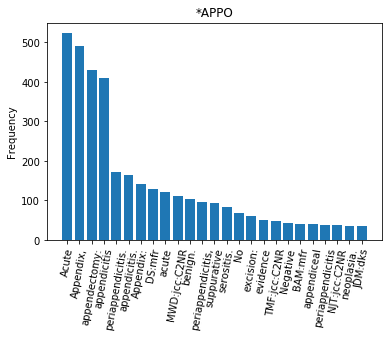



*COL-P 

dysplasia       313
Colon,          276
malignancy.     268
high-grade      263
Tubular         237
adenoma.        223
biopsy:         211
polyp           193
evidence        175
polypectomy:    173
cm,             165
There           142
Negative        112
polyp.           87
Hyperplastic     86
fragments        85
TWK:slh:C2NR     84
adenoma          82
tubular          81
colon,           79
No               77
polyp:           77
DS:mfr           74
polyp,           73
colon            73
dtype: int64


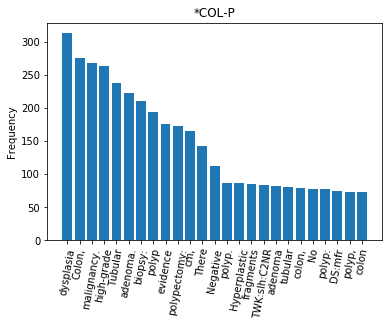



*GALLB 

Gallbladder,        880
cholecystectomy:    789
cholecystitis       494
Chronic             438
chronic             368
Cholelithiasis.     356
cholecystitis.      324
cholelithiasis.     259
DS:mfr              191
No                  185
Gallbladder:        184
Acute               166
Mild                131
evidence            128
MWD:jcc:C2NR        122
benign.             113
cholesterolosis.    107
malignancy.         103
Cholesterolosis.    102
lymph                93
cholelithiasis,      92
neoplasia.           88
BAM:mfr              85
acute                85
Negative             76
dtype: int64


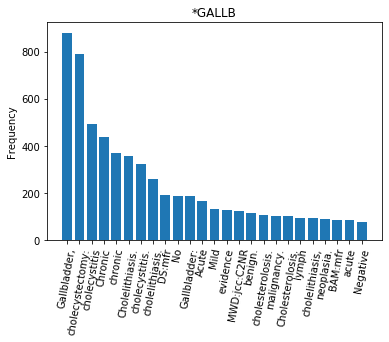



*PLAC 

umbilical          985
placenta           953
cord               798
acute              662
inflammatory       650
Mild               601
villous            598
chorionic          556
showing:           482
trivascular        476
The                453
INTERPRETATION:    446
villi              428
maturation.        407
MWD:jcc:C2NR       401
Term               399
meconium           390
placental          306
fetal              299
Appropriate        296
trimester          286
gestational        265
deposition.        263
changes            259
identified.        228
dtype: int64


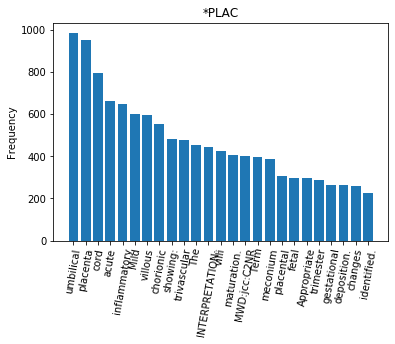



+CDH 

technical        1468
No               1468
diagnosis;       1468
performed        1467
SPECIMEN            1
CONTAINER.          1
THE                 1
NO                  1
N@M3ed              1
IDENTIFIED          1
IS                  1
perforP@T!3NT       1
IN                  1
dtype: int64


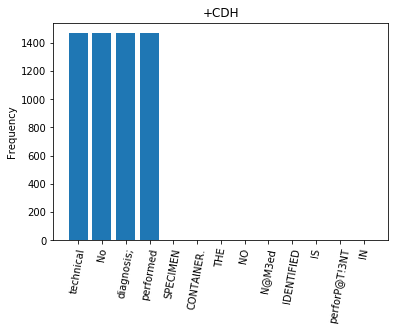



+KBR 

performed              1550
diagnosis;             1550
No                     1550
technical              1549
Skin,                    15
biopsy:                  14
This                     10
lateral                  10
case                      9
Dermatopathologist.       9
dictated                  9
reviewed                  9
left                      8
shave                     7
Webb,                     7
present                   7
R.                        7
Board-Certified           7
punch                     7
Alden                     7
D.O.,                     7
B.                        6
A.                        6
right                     6
cell                      5
dtype: int64


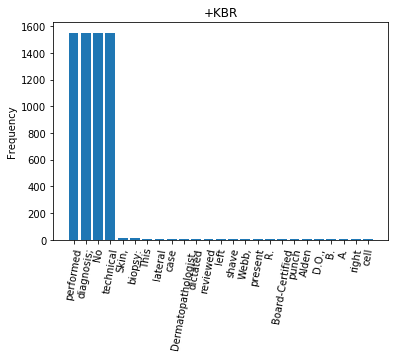



+RMS 

performed     578
technical     578
No            578
diagnosis;    578
dtype: int64


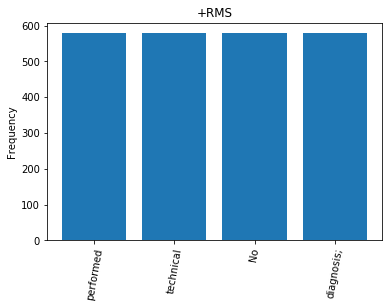



+RSH 

No                     5244
diagnosis;             5243
performed              5242
technical              5237
Skin,                    67
biopsy:                  59
shave                    52
reviewed                 46
case                     44
This                     43
dictated                 42
Dermatopathologist.      42
right                    31
Webb,                    30
R.                       30
Alden                    30
D.O.,                    30
left                     30
Board-Certified          30
lateral                  28
present                  25
B.                       21
A.                       21
only.                    20
Slide                    19
dtype: int64


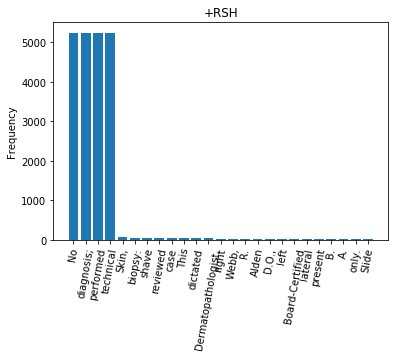



+SKO1 

No                 1815
diagnosis;         1814
performed          1813
technical          1801
P@T!3NT              11
N@M3echnical         10
tecP@T!3NT            2
perforP@T!3NT         2
N@M3                  2
N@M3nical             2
N@M3ed                2
N@M3nosis;            1
N@M3y                 1
N@M3hniP@T!3NT        1
onP@T!3NT             1
N@M3ly                1
teP@T!3NT             1
technicaP@T!3NT       1
N@M3osis;             1
N@M3al                1
N@M3ical              1
diaP@T!3NT            1
techP@T!3NT           1
performP@T!3NT        1
diagP@T!3NT           1
dtype: int64


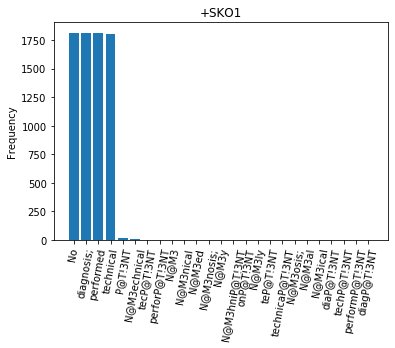



+SLD 

diagnosis;             1447
No                     1447
technical              1446
performed              1445
IS                        3
case                      1
dictated                  1
SENT                      1
MARKETING                 1
reviewed                  1
M.D.,                     1
Microscopic               1
N@M3al                    1
IN                        1
Examination).             1
Mancong                   1
EMPTY                     1
Skin,                     1
biopsy:                   1
Ph.D.,                    1
teP@T!3NT                 1
Dermatopathologist.       1
shave                     1
Zhang,                    1
N@M3hniP@T!3NT            1
dtype: int64


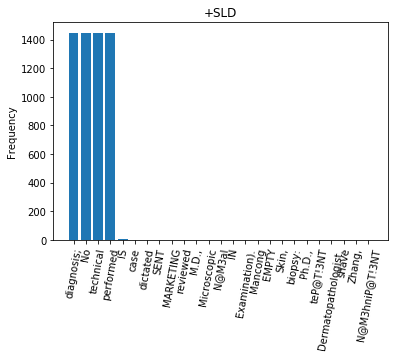



ANT-BX 

Negative         4566
biopsy:          3502
mucosa           2781
intestinal       2249
chronic          2012
antrum,          1995
malignancy.      1994
dysplasia        1850
Stomach,         1845
Gastric          1671
A.               1498
pylori           1447
B.               1431
metaplasia,      1287
gastric          1230
H.               1220
Helicobacter     1188
mild              918
biopsies:         904
reactive          889
Benign            852
metaplasia        847
stain.            836
inflammation.     796
H&E               774
dtype: int64


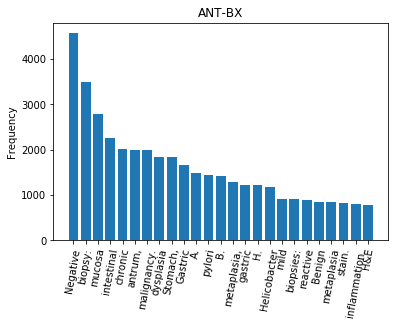



APPO 

Appendix,            2116
appendectomy:        2000
Acute                1898
appendicitis         1342
appendicitis.         693
periappendicitis.     675
acute                 359
suppurative           357
serositis.            321
DS:mfr                252
Appendix:             196
inflammation          189
JDM:dks               172
Negative              169
transmural            161
periappendicitis      156
periappendicitis,     151
JVR:smh:C2NR          137
MWD:jcc:C2NR          136
appendicitis,         121
excision:             120
focal                 117
obliteration          116
appendix              116
perforation.          114
dtype: int64


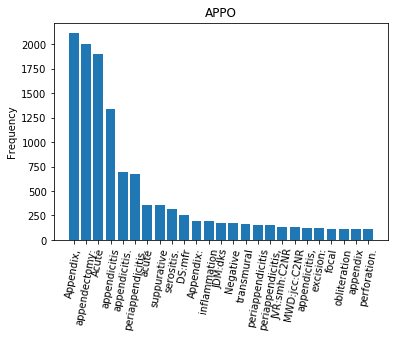



BEL-PROS6BX 

prostatic          3747
Tumor              3447
tissue.            3082
Benign             2804
Left               2229
Right              2224
apex:              1482
base:              1481
mid:               1479
Prostatic          1234
Gleason            1191
Perineural         1186
invasion:          1179
quantitation:      1166
involves           1130
Longest            1089
confluent          1076
length             1056
tumor:             1026
mm.                1026
adenocarcinoma.     975
present             943
score:              915
core                895
identified.         890
dtype: int64


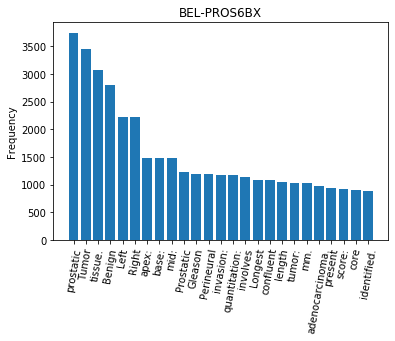



BONEF-O 

Bone             479
cartilage        469
degenerative     412
features.        335
knee             322
contents:        304
Right            259
Left             239
bone             211
IRG:glc:C2NR     150
present.         147
tissue           121
hematopoietic    115
Negative         107
elements         105
right            105
Bone,            102
Unremarkable      98
left              93
Benign            88
excision:         86
resection:        84
IRG:slh:C2NR      81
malignancy.       81
consistent        78
dtype: int64


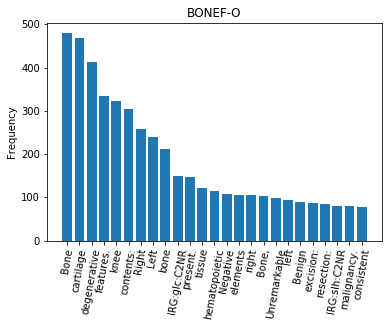



CL-ANT-BX 

Negative         3086
biopsy:          2455
dysplasia.       1791
metaplasia       1483
intestinal       1112
chronic          1038
Stomach,         1032
mucosa           1025
B.               1003
A.               1003
Esophagus,       1002
Helicobacter      886
esophagitis       864
Barrett's         851
antrum,           809
atrophy,          780
distal,           691
cell              664
goblet            663
inflammation,     623
Gastric           611
pylori.           603
Chronic           591
C.                570
mild              495
dtype: int64


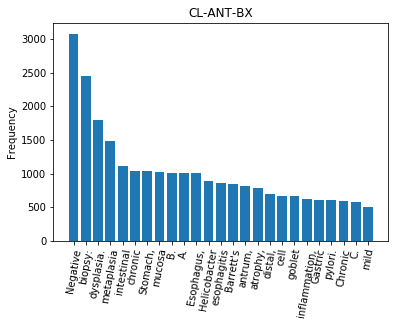



CL-COL-P 

Colon,          4579
polypectomy:    4398
adenoma.        3812
Tubular         3167
A.              1505
B.              1503
polyp.          1198
"polyp":        1102
colon           1036
dysplasia.      1032
Hyperplastic    1014
C.               937
No               937
high-grade       812
descending,      712
serrated         704
transverse,      609
ascending,       605
Negative         540
BMH:glc:C2NR     534
D.               512
hyperplastic     506
Sessile          491
biopsy,          479
BMH:smn:C2NR     472
dtype: int64


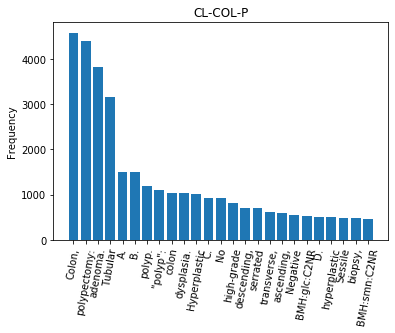



CL-COLBX 

Colon,          1469
Negative        1184
biopsy:         1136
colonic          789
colitis.         728
chronic          638
mucosa           628
mucosa.          523
dysplasia.       517
acute,           501
A.               487
B.               486
inflammatory     475
random,          449
microscopic      438
colon            426
polypectomy:     422
Benign           395
biopsies:        352
Colonic          352
adenoma.         344
Normal           339
abnormality.     318
significant      278
C.               275
dtype: int64


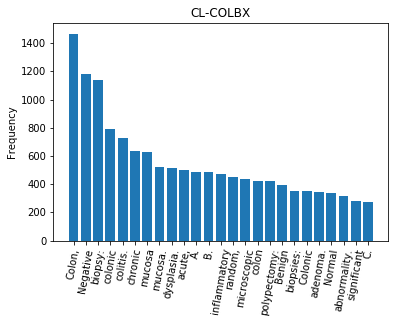



CL-DUOBX 

Negative         4113
biopsy:          3500
dysplasia.       1874
metaplasia       1607
mucosa           1527
inflammation,    1413
intestinal       1164
B.               1148
A.               1147
Duodenum,        1111
chronic          1103
second           1097
C.               1077
mucosa.          1075
Stomach,         1057
Helicobacter      917
Esophagus,        906
Barrett's         876
portion,          868
Normal            840
atrophy,          819
celiac            810
esophagitis       777
sprue.            756
duodenal          753
dtype: int64


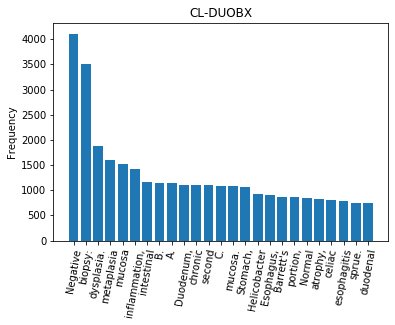



CL-SIG-P 

polypectomy:    711
Colon,          678
polyp.          456
Hyperplastic    425
sigmoid,        400
adenoma.        356
Tubular         275
colon           207
Sigmoid         178
B.              149
A.              148
BMH:glc:C2NR    136
"polyp":        134
BMH:smn:C2NR    128
hyperplastic    117
sigmoid         101
Negative         83
dysplasia.       80
BMH:slh:C2NR     80
mucosa           73
C.               65
high-grade       64
biopsy:          61
No               59
polyps,          55
dtype: int64


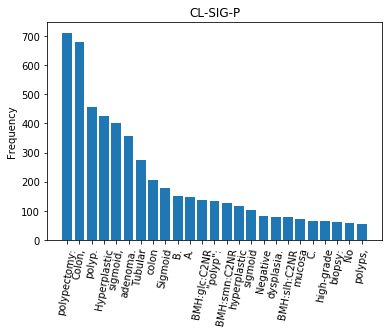



COL-P 

Tubular         8739
adenoma.        8605
biopsy:         7685
polyp,          7111
polypectomy:    6652
Colon,          5131
A.              4845
B.              4709
colon           4676
Negative        3477
Colon           3414
polyp.          3208
Fragments       2991
dysplasia       2931
Hyperplastic    2731
tubular         2682
adenoma         2612
malignancy.     2597
colon,          2520
high-grade      2460
Ascending       2180
colonic         2174
hyperplastic    2143
polyp           2056
mucosa          1952
dtype: int64


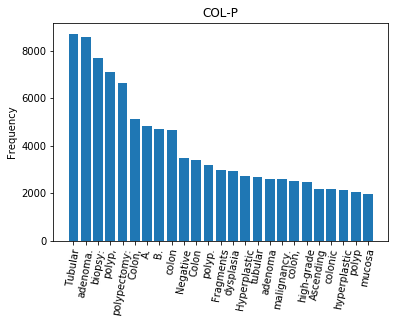



COL-P:KNB1TCC.UXXX7JOGFDWKIQ 

adenoma.        870
A.              859
B.              853
Tubular         813
polyp,          740
biopsy:         674
polypectomy:    637
colon           534
Colon,          452
Colon           324
tubular         312
Fragments       300
dysplasia       267
Negative        263
adenoma         247
cm,             245
high-grade      243
Ascending       243
polyp.          233
malignancy.     230
polyp           194
Hyperplastic    186
Transverse      167
serrated        162
Descending      155
dtype: int64


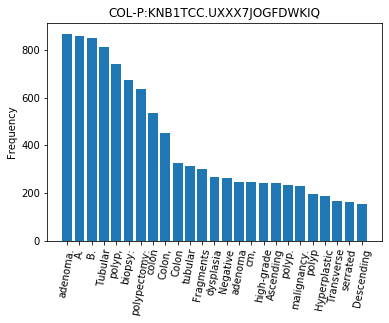



COLBX 

Negative        4268
biopsy:         4119
Colon,          3050
colonic         2366
mucosa          2214
biopsies:       2066
dysplasia       1959
colitis.        1819
malignancy.     1652
A.              1639
B.              1612
active          1425
colon,          1316
dysplasia.      1262
chronic         1235
Benign          1145
diagnostic      1100
colitis,        1036
No              1032
mucosa.         1024
colon            985
microscopic      916
abnormality.     866
bowel            826
Colonic          789
dtype: int64


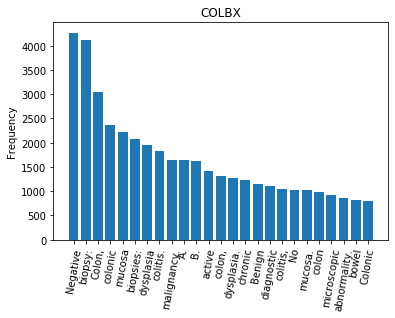



CON-SR 

reviewed               1160
case                   1148
This                   1111
Skin,                  1108
Dermatopathologist.    1077
dictated               1059
biopsy:                1032
shave                   801
Board-Certified         797
D.O.,                   787
R.                      787
Webb,                   787
Alden                   786
performed               686
lateral                 566
present                 552
COMMENT:                547
No                      539
left                    531
diagnosis;              518
technical               517
right                   480
The                     385
(see                    330
Comment).               322
dtype: int64


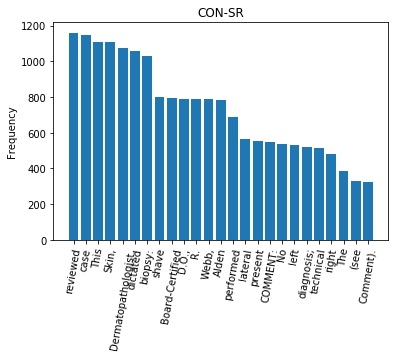



CXBX 

squamous           1607
biopsy:             990
endocervical        909
dysplasia           887
Cervix,             860
(CIN                828
A.                  825
B.                  825
intraepithelial     806
lesion              700
grade               681
See                 558
comment.            462
benign              454
No                  438
identified.         428
Endocervical        427
biopsies:           421
curettings:         409
glandular           396
malignancy.         392
Endocervix,         389
Cervical            363
mucosa              360
fragments           359
dtype: int64


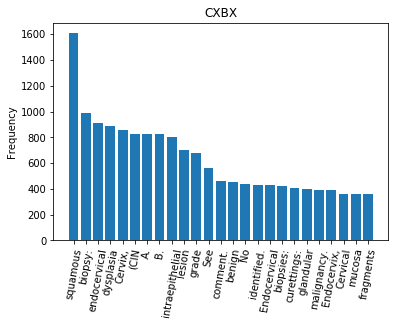



CXBX12 

squamous           1380
biopsy:            1357
Cervix,             821
dysplasia           742
A.                  707
B.                  705
(CIN                686
intraepithelial     665
endocervical        646
o'clock,            639
12                  611
lesion              552
grade               517
Cervix              401
mild                386
See                 359
mucosa              335
Negative            333
Benign              326
C.                  326
identified.         322
dysplasia.          320
benign              319
Endocervical        318
No                  308
dtype: int64


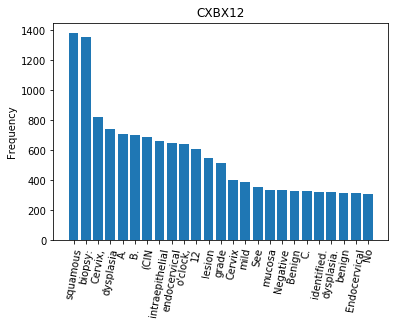



CXBX6 

squamous           1301
biopsy:            1266
dysplasia           817
Cervix,             765
B.                  700
A.                  697
(CIN                674
o'clock,            629
endocervical        627
6                   579
intraepithelial     563
lesion              461
C.                  403
grade               387
Negative            371
1).                 360
Endocervical        346
mucosa              335
benign              330
mild                329
Cervix              315
dysplasia.          313
cervical            309
Benign              309
curettings:         307
dtype: int64


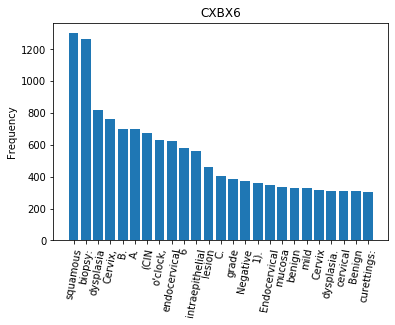



CXCONE 

squamous           1602
endocervical       1243
dysplasia          1122
(CIN               1042
Cervix,             996
intraepithelial     921
LEEP                866
lesion              814
dysplasia.          797
grade               681
A.                  669
B.                  668
negative            519
margins             423
Negative            419
LEEP:               399
Endocervical        392
CIN                 385
identified.         383
No                  375
biopsy:             371
margin              367
excision:           356
ectocervical        336
The                 321
dtype: int64


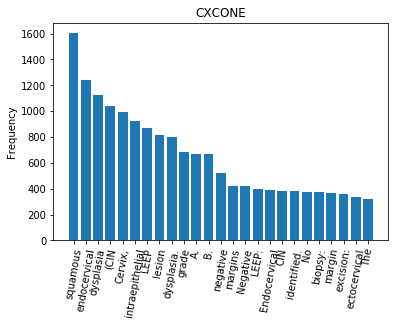



CXPOLYP 

endocervical    1094
Cervical         925
Benign           919
polyp,           895
polyp.           700
biopsy:          689
polyp            507
malignancy.      499
dysplasia        483
Cervix,          473
polypectomy:     353
No               347
polyp:           340
glandular        336
squamous         333
Negative         325
Endocervical     251
identified.      237
atypia           229
benign           220
evidence         216
HJ:clv:C2NR      178
malignancy       177
without          175
chronic          161
dtype: int64


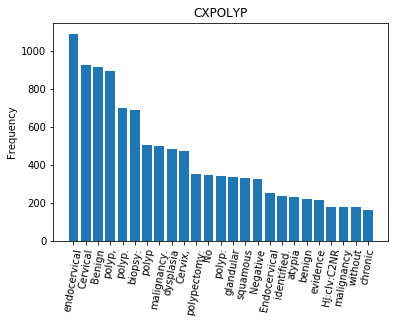



CYST 

cyst.                  380
excision:              362
Benign                 286
tissue,                226
Soft                   188
A.                     187
cyst                   184
cyst,                  179
right                  177
This                   169
left                   167
reviewed               166
case                   166
dictated               165
Dermatopathologist.    153
Board-Certified        153
M.D.,                  146
Right                  133
No                     129
Skin,                  128
Left                   125
PH:clv:C2NR            123
Herreid,               122
Peter                  122
tissue                 109
dtype: int64


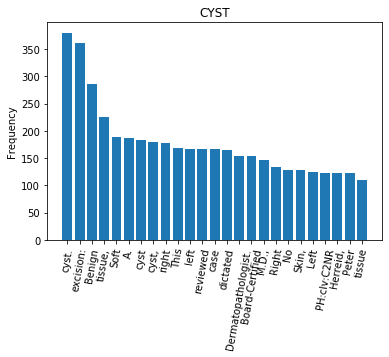



DUOBX 

biopsy:            5943
Negative           5708
mucosa             3697
A.                 2396
B.                 2360
Duodenum,          2038
malignancy.        2023
intestinal         1691
chronic            1688
dysplasia          1597
diagnostic         1555
No                 1521
biopsies:          1507
C.                 1503
Benign             1492
abnormality.       1465
duodenal           1462
mucosa.            1164
intraepithelial    1155
Duodenal           1125
Stomach,           1111
Gastric            1076
gastric             990
celiac              984
dysplasia.          960
dtype: int64


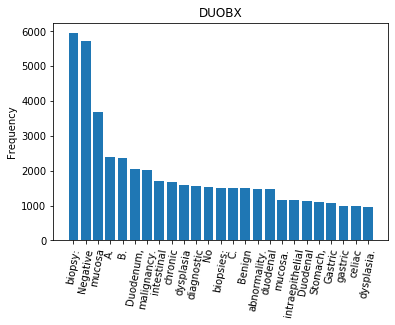



ECC 

squamous           3728
endocervical       2888
dysplasia          2220
biopsy:            2023
Endocervical       2007
curettings:        1896
B.                 1712
A.                 1711
Endocervix,        1572
benign             1448
(CIN               1364
intraepithelial    1356
malignancy.        1248
glandular          1205
grade              1175
fragments          1175
Cervix,            1165
curettage:         1156
No                 1143
lesion             1130
Negative           1087
mucosa             1049
identified.        1030
See                1010
Benign              951
dtype: int64


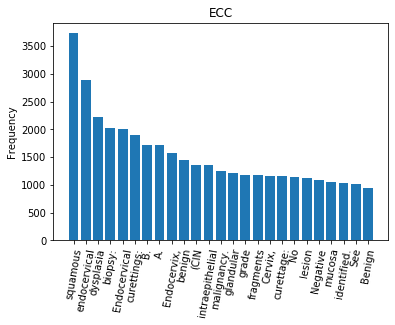



EMBX1 

biopsy:          13211
Endometrial       7194
endometrial       6390
Endometrium,      6167
malignancy.       5683
endometrium       5537
hyperplasia       4903
Negative          4686
proliferative     3898
atypia            3683
hyperplasia,      3453
endometrium.      3272
cytologic         3223
No                3196
Benign            3037
fragments         2789
without           2760
benign            2727
glandular         2347
identified.       2216
endocervical      1947
stromal           1891
Proliferative     1871
atypia,           1752
atypia.           1527
dtype: int64


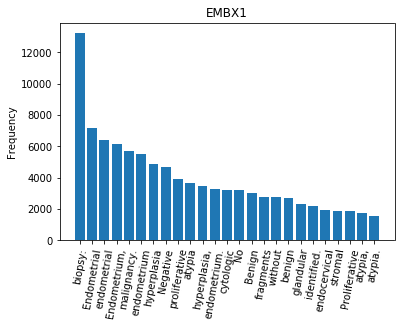



EMC1 

curettings:      1067
Endometrial      1022
endometrial       890
endometrium       843
malignancy.       780
Negative          780
Endometrium,      702
hyperplasia       677
proliferative     673
benign            628
fragments         585
curettage:        530
Benign            525
atypia            497
Fragments         452
endocervical      417
endometrium.      398
polyp.            330
without           325
No                324
hyperplasia,      308
atypia.           293
glandular         287
stromal           283
negative          269
dtype: int64


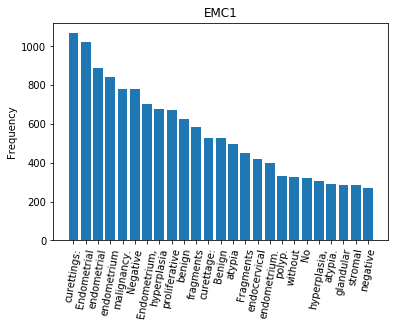



ESBX 

biopsy:         3203
Negative        3168
mucosa          2707
Esophagus,      1627
dysplasia       1462
esophagus,      1425
intestinal      1343
malignancy.     1286
squamous        1266
dysplasia.      1252
Barrett's       1174
chronic         1079
biopsies:       1027
metaplasia       931
A.               923
B.               904
Distal           871
esophagitis.     774
Squamous         761
reactive         727
metaplasia,      719
esophageal       706
mild             612
eosinophilic     605
cm,              551
dtype: int64


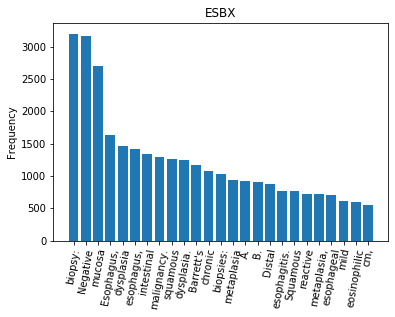



FAL 

fallopian         855
tubes,            487
Bilateral         301
Fallopian         249
cross             246
sections          234
bilateral         208
segments          203
Two               201
tubes             198
benign            181
identified.       179
completely        158
tubes:            148
tube              142
transected.       139
left              139
Complete          138
salpingectomy:    136
bilateral,        136
segmental         123
Right             121
JVR:smh:C2NR      105
right             102
oviduct,           97
dtype: int64


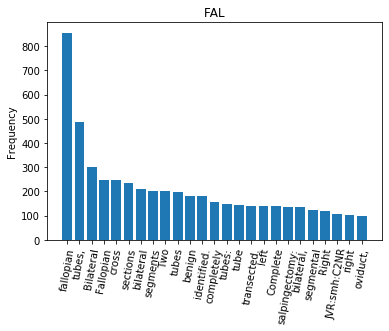



FAL2-ST 

fallopian         1493
Complete           652
tube,              613
B.                 568
A.                 468
tube               465
Right              450
cross              442
Left               417
tube.              377
sterilization:     292
sections           268
unremarkable       266
salpingectomy:     264
transection.       234
segment,           198
Fallopian          191
section            187
identified.        169
tubal              135
left               121
DS:mfr             112
A,                 110
tube:              106
ligation:          104
dtype: int64


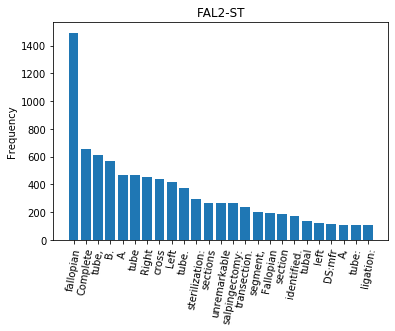



GALLB 

Gallbladder,        4976
cholecystectomy:    4722
Chronic             2982
cholecystitis       2446
cholecystitis.      2343
chronic             2046
cholelithiasis.     1442
Cholelithiasis.     1255
Acute                734
Mild                 724
cholesterolosis.     605
No                   567
Cholelithiasis       552
Gallbladder:         543
lymph                522
Negative             515
JVR:smh:C2NR         440
DS:mfr               439
calculous            372
Cholesterolosis.     367
malignancy.          327
cholecystitis,       312
benign.              307
Benign               291
node.                286
dtype: int64


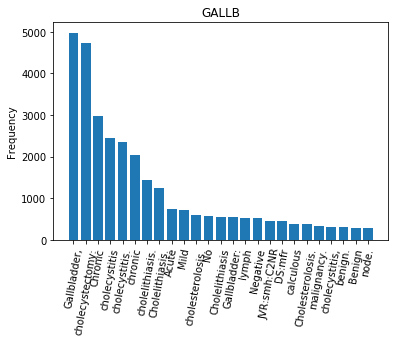



GANGC 

cyst.                  358
excision:              303
tissue,                295
Soft                   286
Benign                 278
ganglion               277
left                   191
This                   185
right                  185
reviewed               182
dictated               182
case                   182
Dermatopathologist.    178
wrist,                 171
Board-Certified        169
M.D.,                  167
A.                     163
Peter                  148
PH:clv:C2NR            148
Herreid,               148
Ganglion               136
Left                   124
Right                  118
tissue                 104
wrist:                 100
dtype: int64


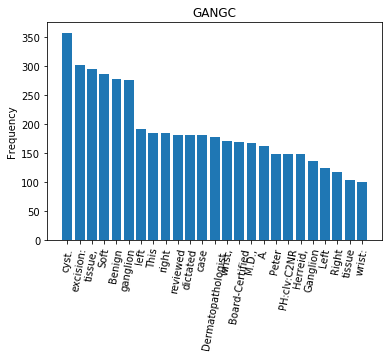



GBX 

Negative        3345
biopsy:         2937
mucosa          2156
Gastric         1883
intestinal      1655
chronic         1551
Helicobacter    1383
A.              1140
B.              1129
gastric         1100
malignancy.      946
pylori           944
dysplasia        930
Benign           894
Stomach,         857
dysplasia.       836
biopsies:        785
metaplasia       772
mild             731
metaplasia,      714
reactive         633
gastritis.       609
organisms        604
C.               567
No               547
dtype: int64


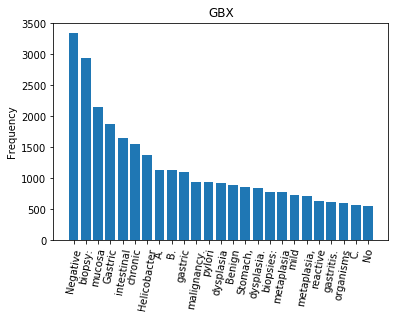



GEJUNC 

Negative            1305
mucosa              1203
biopsy:             1199
junction,            885
intestinal           660
GE                   638
chronic              630
Gastroesophageal     608
dysplasia.           533
dysplasia            495
metaplasia           471
malignancy.          461
squamous             445
A.                   372
Barrett's            363
mild                 359
B.                   352
Benign               314
inflammation.        309
metaplasia,          307
gastric              306
biopsies:            293
reactive             289
metaplasia.          254
esophagitis.         241
dtype: int64


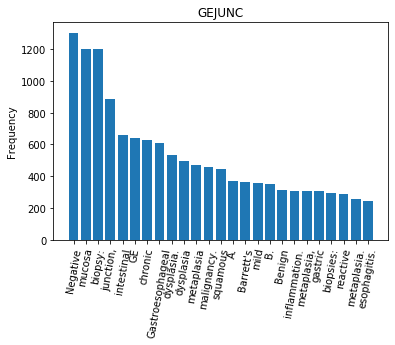



HEMO 

hemorrhoidectomy:    399
Hemorrhoids,         377
Benign               346
hemorrhoids.         324
hemorrhoidal         291
mucosa               273
consistent           248
dysplasia            245
Hemorrhoids:         213
dilated              204
tissue,              203
malignancy.          202
No                   183
squamous             183
tissue               145
Soft                 139
associated           138
anorectal            136
chronic              135
region:              131
Negative             131
Phlebectasia         123
PH:clv:C2NR          120
excision:            120
identified.          116
dtype: int64


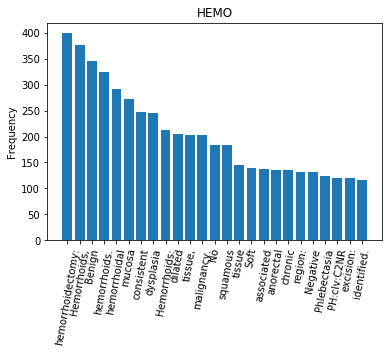



KAD-APPENDIX A 

Appendix,            849
appendectomy:        848
appendicitis         623
Acute                588
neoplasia.           408
periappendicitis.    328
Negative             307
acute                270
evidence             240
No                   234
appendicitis.        197
AMB:emb:C2NR         157
Marked               148
serositis            141
AMB:rrc:C2NR          95
present.              87
periappendicitis      81
Benign                62
AMB:mdm:C2NR          55
appendix              54
Inspissated           42
chronic               42
fecalith              37
neoplasia             31
necrotizing           31
dtype: int64


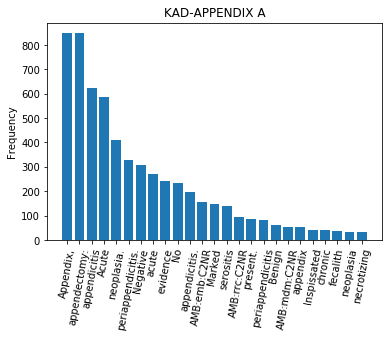



KAD-BRST NBX 

core           1214
biopsies:      1043
breast         1007
needle          960
score:          587
Left            561
case            545
reviewed        544
Assurance       539
As              539
Quality         539
GESTALT         539
another         539
part            539
member          538
Program,        537
Negative        510
Right           477
ductal          464
carcinoma       441
breast,         423
tissue          392
fibrocystic     372
Pathology.      366
3               322
dtype: int64


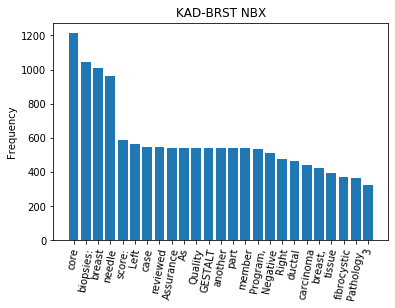



KAD-CECUM BX 

Colon,         464
biopsies:      450
adenoma.       421
No             353
evidence       336
dysplasia      324
Tubular        307
grade          301
high           301
adenoma        291
tubular        290
malignancy.    271
A.             271
polyp,         255
biopsy:        234
colonic        222
B.             222
Cecal          212
Multiple       191
Negative       186
Fragments      166
cecum:         157
mucosa         143
polyp.         138
showing        136
dtype: int64


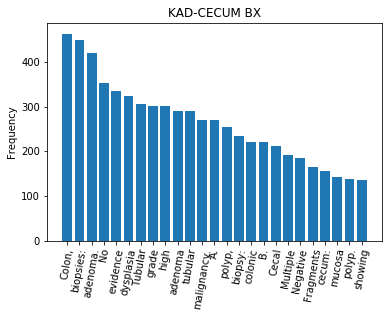



KAD-COL ASC BX 

biopsies:      649
Colon,         638
No             538
adenoma.       515
evidence       461
dysplasia      438
grade          426
high           425
Tubular        416
adenoma        415
tubular        408
Ascending      392
A.             365
malignancy.    352
colonic        330
B.             304
biopsy:        303
polyp,         287
colon,         283
Multiple       274
ascending:     271
Negative       267
Fragments      230
mucosa         210
colon          202
dtype: int64


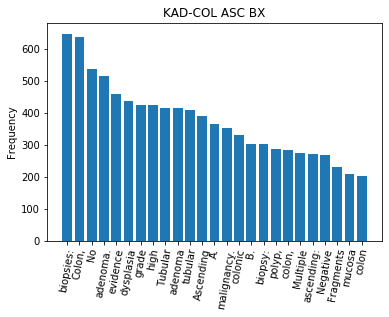



KAD-COL BX 

Colon,          400
biopsies:       364
Colon           307
adenoma.        305
Tubular         292
cm,             286
No              278
polyp           272
evidence        269
dysplasia       266
adenoma         252
tubular         249
grade           248
high            247
malignancy.     190
biopsy:         184
colonic         182
Multiple        157
cm:             140
Negative        126
mucosa          126
showing         123
polyps,         119
AMB:emb:C2NR    118
A.              117
dtype: int64


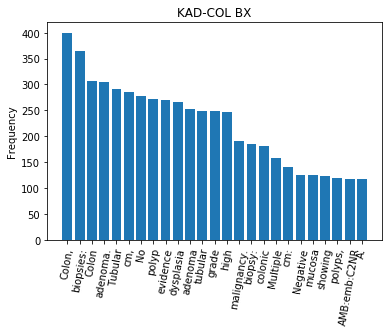



KAD-DUO BX 

biopsies:       1174
Negative         907
Duodenum,        843
A.               761
biopsy:          532
No               495
active           439
villous          366
acute            358
B.               352
significant      350
blunting.        346
Unremarkable     344
mucosa           343
inflammation     314
Benign           281
mucosa.          268
dysplasia.       267
vascular         267
pathologic       260
abnormality      258
granulomas       257
congestion.      249
Stomach,         249
gland            248
dtype: int64


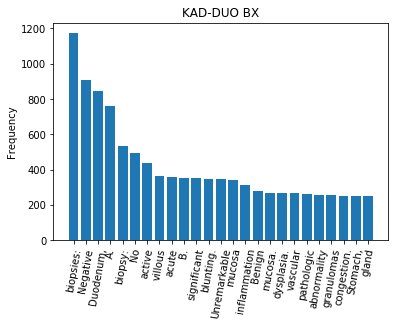



KAD-EM BX 

biopsy:          872
Endometrium,     842
endometrium      740
Negative         530
without          494
atypia           469
polyp            459
malignancy.      434
proliferative    416
hyperplasia      378
Endometrium:     348
endometrial      346
phase            327
Benign           321
benign           296
stromal          294
atypia,          290
Proliferative    282
polyp,           264
fragments        257
AMB:emb:C2NR     248
obvious          221
endometrium,     208
tubal            182
glandular        177
dtype: int64


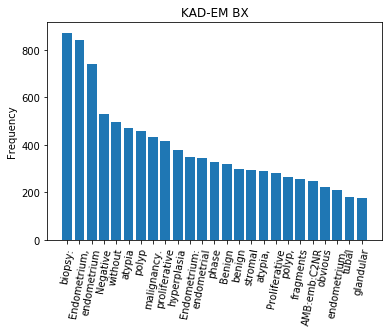



KAD-EMC 

Endometrium,     408
endometrium      351
Negative         297
curettage:       266
without          256
atypia           252
endometrial      234
malignancy.      226
polyp            205
proliferative    204
stromal          202
benign           194
curettings:      181
hyperplasia      178
Benign           149
phase            149
Fragments        135
Endometrium:     129
fragments        129
glandular        126
Proliferative    124
polyp.           124
endometrium,     120
AMB:emb:C2NR     112
mucosa           111
dtype: int64


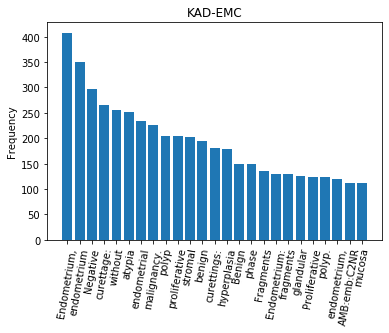



KAD-GASTRIC BX 

biopsies:        1256
Negative          974
Stomach,          777
mucosa            631
A.                550
vascular          452
Benign            423
Gastric           419
congestion.       407
No                382
gastric           371
inflammation.     354
biopsy:           324
dysplasia         322
acute             320
B.                287
Mild              261
gastritis         244
pylori            228
Helicobacter      212
chronic           210
malignancy.       207
AMB:emb:C2NR      195
abnormality       184
active            181
dtype: int64


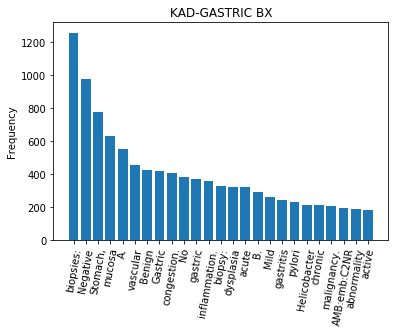



KAD-GB 

Gallbladder,          1575
cholecystectomy:      1573
Chronic               1270
cholecystitis         1141
evidence               767
No                     756
neoplasia              508
Cholelithiasis         421
cholelithiasis.        398
cholecystitis.         388
AMB:emb:C2NR           298
neoplasia.             287
chronic                258
present                239
Cholelithiasis.        235
Rokitansky-Aschoff     227
sinuses                225
lymph                  224
cholelithiasis         195
cholesterolosis.       186
AMB:rrc:C2NR           152
duct                   142
cystic                 138
AMB:mdm:C2NR           132
node.                  121
dtype: int64


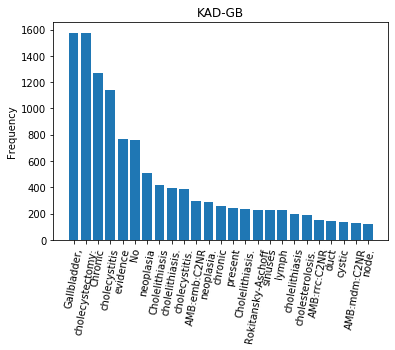



KAD-PLAC 3T 

gestational      2748
umbilical        2699
cord             2690
No               2367
pathologic       2234
age.             2208
evidence         1879
maturation       1420
abnormality.     1394
membranes        1357
Fetal            1346
fetal            1338
villi            1331
Chorionic        1328
percentile       1322
grams),          1321
Placenta         1307
Placental        1304
vessel           1275
approximately    1222
weight:          1156
infectious       1076
membranes:       1074
process.         1074
inflammatory     1072
dtype: int64


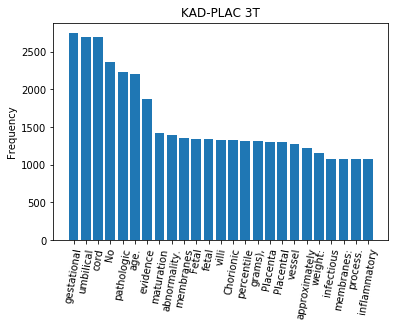



KAD-PLAC 3T GRS 

AS             4694
CORD           4694
AND            4694
PLACENTA       4693
TRIVASCULAR    4693
GROSSLY        4692
TERM           4691
DESCRIBED.     4683
GRAMS)         3734
A.             2673
UMBILICAL      1836
g)              514
fallopian       217
B.              137
tube,           134
pathologic      104
Fallopian       101
cross            91
identified.      79
sections         77
No               76
C.               74
tube             67
full             59
without          56
dtype: int64


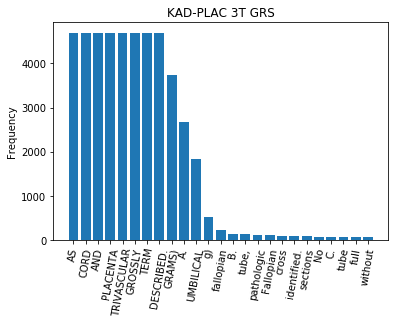



KAD-RECTAL BX 

Rectal          277
biopsy:         193
biopsies:       177
Rectum,         175
polyp,          165
polyp.          161
Hyperplastic    160
adenoma         149
Negative        147
Tubular         135
dysplasia       115
malignancy.     115
adenoma.        115
No              104
evidence         94
mucosa           86
grade            81
hyperplastic     80
high             78
AMB:emb:C2NR     78
colonic          77
polyp:           69
AMB:rrc:C2NR     62
malignancy       62
Fragments        58
dtype: int64


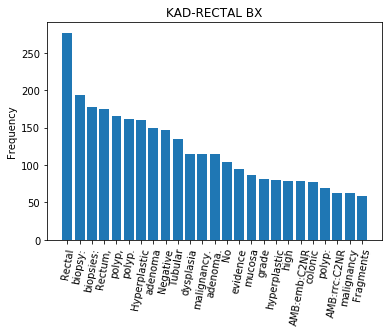



KAD-SK BX <1CM 

Skin,                  2584
biopsy:                1761
left                   1266
right                  1243
shave                  1208
present                1026
biopsy                  918
cell                    835
This                    805
case                    774
reviewed                773
dictated                769
Dermatopathologist.     747
Board-Certified         707
M.D.,                   613
carcinoma               610
edges.                  596
Christopher             557
L.                      557
Rozelle,                557
melanocytic             547
Basal                   512
Skin                    511
lesion                  494
carcinoma,              479
dtype: int64


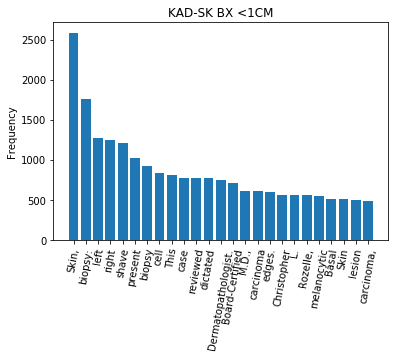



KAD-SK BX1 

Skin,                  1087
cell                    626
excision:               618
left                    587
right                   501
reviewed                436
case                    436
This                    434
dictated                431
Dermatopathologist.     420
Board-Certified         395
M.D.,                   389
carcinoma               380
Rozelle,                361
L.                      361
Christopher             360
biopsy:                 343
present                 343
residual                334
biopsy                  330
Skin                    290
site                    273
basal                   268
margins.                228
carcinoma,              213
dtype: int64


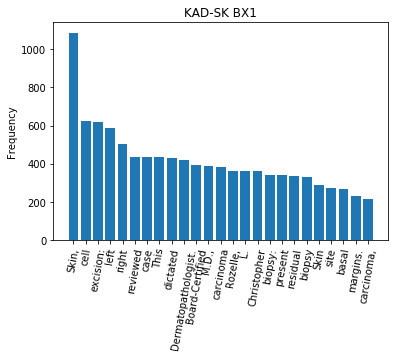



KAD-SOFT NOS 

tissue          525
excision:       467
mass,           312
consistent      216
inflammation    184
Benign          183
Negative        177
right           176
Soft            172
left            160
Right           155
AMB:emb:C2NR    152
without         145
Left            136
adipose         136
features        136
atypical        127
foreign         101
lipoma.          97
body             95
cyst             91
tissue,          90
cyst.            88
chronic          87
AMB:rrc:C2NR     86
dtype: int64


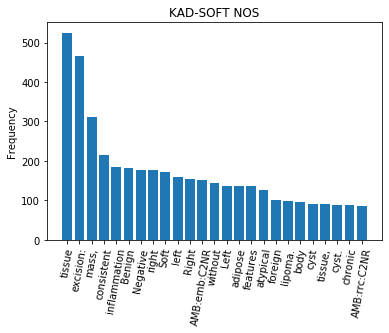



KAD-STONE RENAL 

CHEMICAL       682
FOR            682
FACILITY       682
TO             682
THE            682
FURTHER        682
BE             682
WILL           682
OUTSIDE        682
AN             681
CALCULI        681
SENT           681
IDENTIFIED.    681
SPECIMEN       681
ANALYSIS.      679
chemical        49
specimen        49
Calculi         49
analysis.       49
sent            49
facility        49
outside         49
The             49
identified.     49
A.               8
dtype: int64


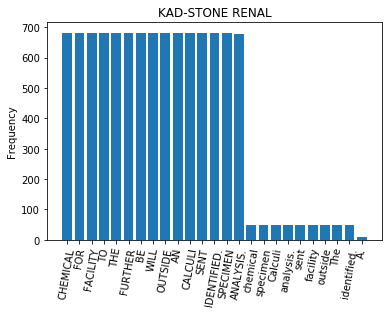



KAD-UT OV 

fallopian         1080
bilateral          832
Benign             521
Uterus             517
grams)             441
tubes              420
hysterectomy       419
salpingectomy:     408
cysts.             400
tubes,             396
atypia             396
pathologic         365
without            324
endometrium        312
Myometrium         269
abnormality        259
benign             240
Proliferative      232
cm                 208
glandular          205
Cervix             197
negative           195
Serosa             194
Endometrium        194
proliferative      192
dtype: int64


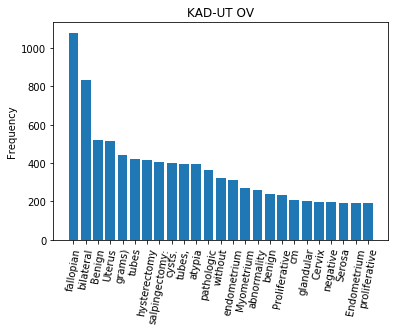



KIDST 

Stone        586
Calculi      513
analysis     458
pending.     323
material     312
present.     304
kidney       282
stone:       249
addendum.    180
Left         154
Calcium      144
Right        126
Submitted    125
oxalate      124
analysis,    122
results      122
Gross        121
issued       121
x            118
Kidney       117
(gross       116
PAML         116
stones:      114
Nidus:       100
stone         98
dtype: int64


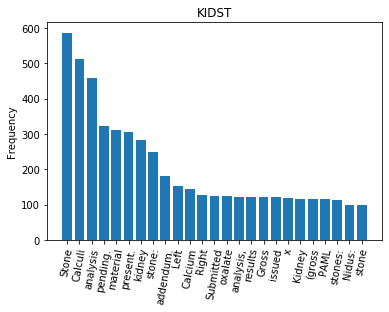



LABIA 

biopsy:                526
Skin,                  220
labia,                 220
labia                  215
dysplasia              177
Negative               139
Benign                 138
Right                  133
squamous               133
Left                   131
A.                     124
malignancy.            121
chronic                119
left                   118
right                  116
See                    114
This                    99
case                    99
reviewed                99
dictated                94
B.                      88
majora,                 86
Dermatopathologist.     80
comment.                78
Board-Certified         76
dtype: int64


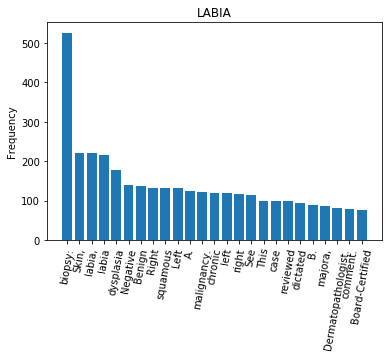



LIP-BX 

report         1022
ICD-10          745
information     678
internal        678
provided        678
lip:            631
lower           422
The             342
additional      340
may             340
within          340
including       340
released        339
submit          339
conveyed        339
sole            339
It              339
accurate        339
adjustments     339
received        339
selection       339
based           339
appropriate     339
contained       339
coding          339
dtype: int64


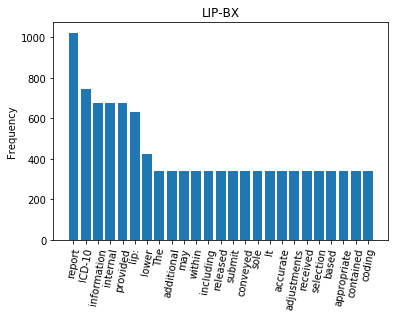



LIPOMA 

tissue,                968
excision:              747
Soft                   718
lipoma.                623
consistent             570
Benign                 428
tissue                 419
adipose                384
Lipoma.                341
right                  341
left                   337
A.                     286
This                   243
reviewed               241
case                   241
dictated               239
Mature                 220
Dermatopathologist.    210
Board-Certified        197
Left                   195
Right                  191
M.D.,                  187
mature                 182
fibroadipose           150
back,                  146
dtype: int64


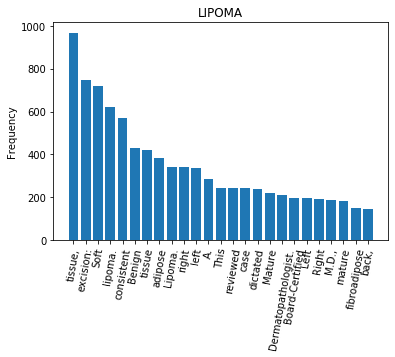



LIV-NBX 

biopsy:          578
Liver,           504
fibrosis         467
needle           459
hepatitis        368
activity         364
4                320
(grade           253
score            248
(stage           244
Metavir          243
Chronic          243
mild             237
core             221
portal           214
Batts-Ludwig;    185
Negative         183
grades,          170
stages,          160
scoring          158
2                156
Liver            153
3                150
Brunt            150
Mild             141
dtype: int64


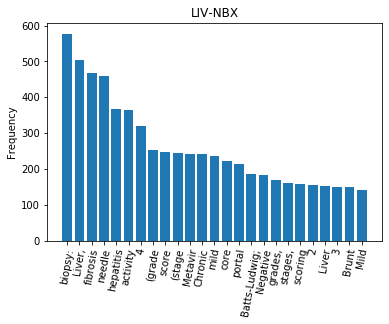



LYM-BX 

lymph          1088
node,           514
node            464
Lymph           447
biopsy:         358
nodes           335
Tumor           331
benign          267
carcinoma       224
Left            213
Negative        212
left            210
negative        209
Right           206
See             200
excision:       194
metastatic      188
right           184
Benign          184
A.              179
invasion:       170
B.              166
carcinoma.      163
Comment.        162
identified.     161
dtype: int64


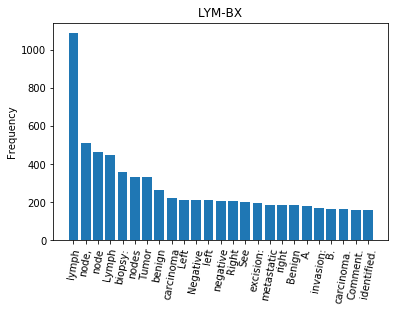



NAIL-PAF 

PAS                    534
Nail                   451
fungal                 444
reviewed               424
case                   424
dictated               424
This                   424
M.D.,                  422
Dermatopathologist.    422
ancillary              411
staining.              395
nail                   363
Board-Certified        355
A.                     333
toe:                   330
identified             329
Peter                  323
Herreid,               323
PH:clv:C2NR            320
segments,              287
first                  287
right                  209
left                   208
routine                206
best                   201
dtype: int64


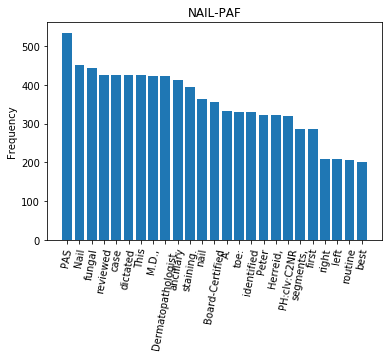



OE-COL-P 

colon           2692
polyp,          2354
polypectomy:    2209
Tubular         2013
endoscopic      1181
adenoma.        1159
polyps,         1119
Hyperplastic     992
biopsies:        903
polyp.           903
Transverse       717
Ascending        670
A.               643
B.               636
biopsy:          622
sigmoid          590
adenoma          587
hyperplastic     569
LT:clv:C2NR      561
colon,           553
mucosa           550
AG:clv:C2NR      517
colonic          514
Sigmoid          508
adenomas.        460
dtype: int64


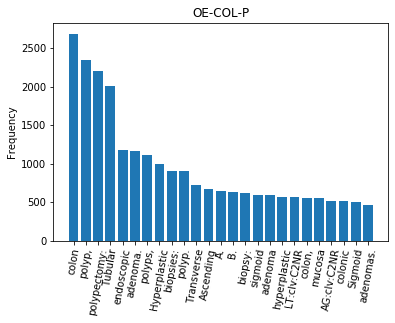



OE-DUOBX 

mucosa          1127
biopsy:         1018
No               710
Negative         689
biopsies:        570
diagnostic       559
B.               532
A.               531
chronic          498
endoscopic       461
Duodenum,        413
Gastric          411
Duodenal         398
pylori           393
C.               371
dysplasia        332
mild             329
abnormality.     323
identified.      303
Stomach,         276
squamous         260
dysplasia.       252
antrum,          240
histologic       239
reactive         218
dtype: int64


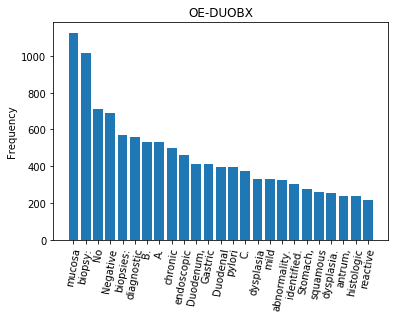



OE-STOMBX 

Negative        1464
mucosa          1229
biopsy:         1133
Gastric          974
pylori           962
No               935
chronic          891
A.               684
B.               683
biopsies:        671
endoscopic       614
dysplasia        588
mild             584
dysplasia.       574
Stomach,         571
antrum,          571
Helicobacter     557
reactive         476
H&E              473
squamous         468
antral           466
H.               422
identified.      417
junction,        412
intestinal       404
dtype: int64


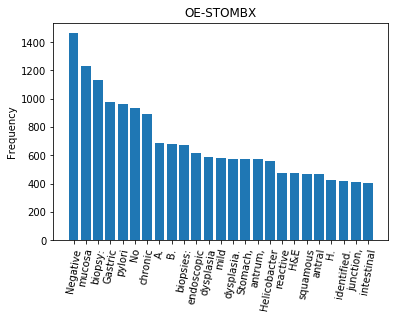



ORAL 

report          4526
ICD-10          3236
information     3012
provided        3012
internal        3012
The             1511
within          1510
including       1507
additional      1507
received        1507
intended        1507
recipient(s)    1506
accurate        1506
coding          1506
audit           1506
claims,         1506
sole            1506
substitute      1506
codes           1506
It              1506
may             1506
released        1506
These           1506
office          1506
valid           1506
dtype: int64


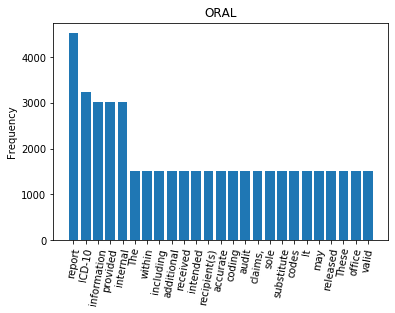



ORALS 

report         2964
ICD-10         2140
provided       1976
internal       1976
information    1976
within          991
The             989
received        988
appropriate     988
report.         988
may             988
intended        988
audit           988
including       988
coding          988
contained       988
It              988
office          988
valid           988
accurate        988
conveyed        988
additional      988
claims,         987
submit          987
adjusted        987
dtype: int64


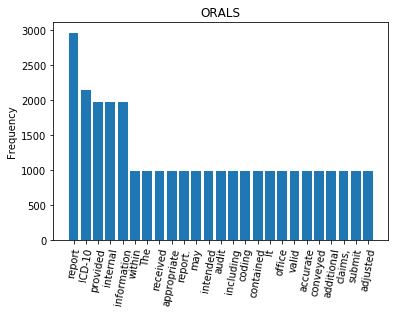



PAR-BLK 

performed         869
No                868
diagnosis;        861
technical         861
nuclear            43
expression.        40
Intact             39
See                38
HER-2              38
Negative           27
gene               25
testing            24
cell               21
breast:            18
amplification.     18
BRAF               18
cells              18
FISH,              16
left               16
Tumor              15
This               15
V600               14
BMH:caw            13
microsatellite     13
ARW:caw            13
dtype: int64


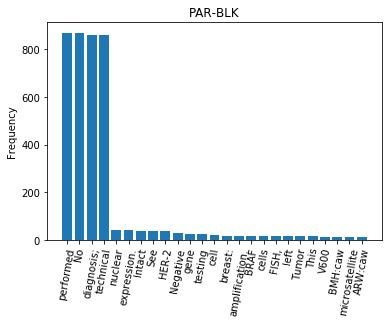



PLAC 

umbilical          1990
placenta           1777
cord               1419
acute              1302
Mild               1002
inflammatory        991
chorionic           948
villous             919
trivascular         740
The                 716
showing:            713
villi               686
INTERPRETATION:     682
placental           678
Term                633
maturation.         629
mild                625
meconium            615
trimester           587
MWD:jcc:C2NR        575
membranes           497
gestational         475
fetal               472
changes             471
Appropriate         462
dtype: int64


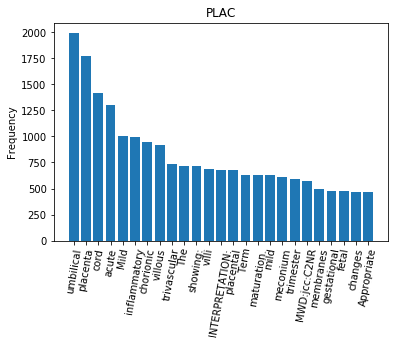



POC-S 

Products        889
chorionic       677
Uterine         605
villi           579
contents:       562
identified.     495
products        493
consistent      416
conception.     416
conception:     414
tissue          340
conception      325
decidua         322
No              314
Immature        243
fetal           234
conception,     225
villi,          214
endometrium     192
immature        188
Fragments       172
decidualized    163
placental       156
somatic         130
changes         123
dtype: int64


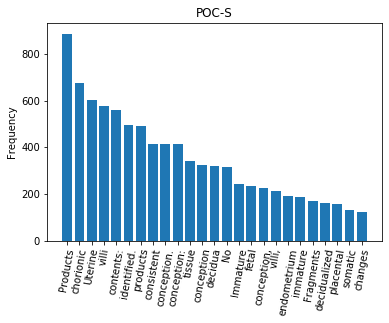



PROS6-BX 

prostatic        3939
Tumor            3860
Benign           3449
tissue.          3332
Left             2948
Right            2946
base:            1961
apex:            1960
mid:             1958
Gleason          1492
Perineural       1426
quantitation:    1398
Prostatic        1390
invasion:        1369
core             1302
confluent        1251
Longest          1239
involves         1189
needle           1185
identified.      1148
+                1137
length           1104
score:           1095
mm.              1078
tissue           1058
dtype: int64


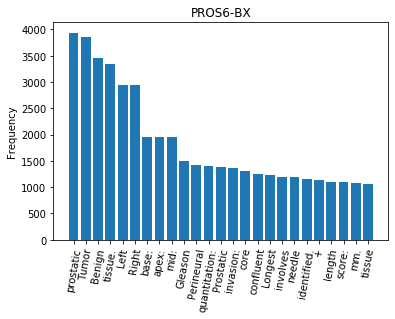



PROS6-BX:DUDBCZSPMKMZTYWDG-QBAQ 

Tumor            6619
prostatic        6355
Benign           4676
tissue.          4505
Left             4219
Right            4200
apex:            2818
mid:             2803
base:            2797
Prostatic        2429
Gleason          2295
two              2281
invasion:        2253
quantitation:    2230
Perineural       2170
involves         2164
confluent        2134
Grade            2132
Longest          2110
mm.              1957
length           1866
tumor:           1852
+                1806
identified.      1794
tissue           1759
dtype: int64


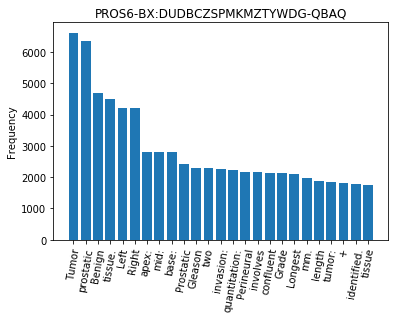



REC 

biopsy:         502
Negative        371
Rectum,         341
mucosa          272
dysplasia       184
Rectal          165
chronic         159
biopsies:       157
malignancy.     145
Colon,          138
colonic         120
hyperplastic    114
dysplasia.      110
Benign          107
active          107
Fragments        96
polyp.           96
No               92
Hyperplastic     88
A.               81
colitis.         81
rectum,          79
B.               77
acute            66
adenoma.         64
dtype: int64


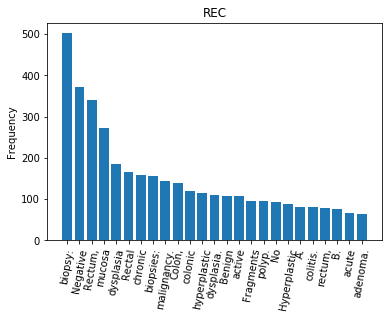



RECT-P 

Rectal                1514
polyp,                1412
polyp.                1396
polypectomy:          1237
Hyperplastic          1178
biopsy:               1165
adenoma.               860
hyperplastic           802
Tubular                681
Rectum,                551
Fragments              551
Colon,                 516
Negative               463
This                   440
case                   438
reviewed               437
dictated               436
M.D.                   409
dysplasia              377
rectum,                364
pathologist.           361
R.                     359
Isaac                  359
fellowship-trained     359
Grindeland,            358
dtype: int64


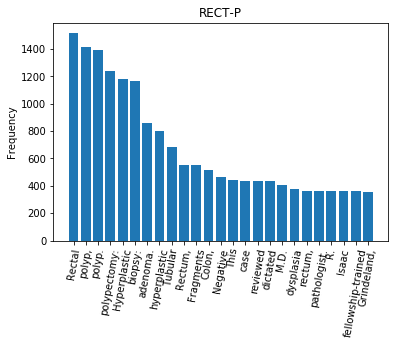



SBRSTNBX 

breast                  961
core                    871
breast,                 716
needle                  648
biopsy:                 626
stereotactic            569
Benign                  568
ductal                  522
Left                    492
Right                   487
o'clock,                474
Negative                463
atypia                  453
tissue                  445
focal                   416
tumor                   407
identified.             398
carcinoma               387
No                      385
biopsies:               375
stromal                 345
fibrocystic             343
microcalcifications.    328
microcalcifications     305
hyperplasia             305
dtype: int64


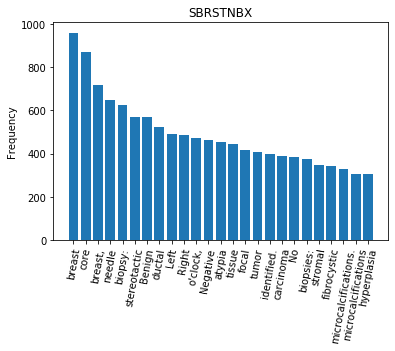



SE-COL-P 

Colon             2104
Fragments         1319
adenoma.          1316
polyp,            1101
polypectomy:      1094
polyps,           1054
polypectomies:    1045
tubular            940
Tubular            872
colon              606
transverse,        602
ascending,         583
adenomas.          556
A.                 542
B.                 540
colonic            500
polyp.             491
hyperplastic       481
sigmoid,           428
mucosa.            414
serrated           407
STL:smn:C2NR       398
polyp:             390
descending,        358
mucosa             341
dtype: int64


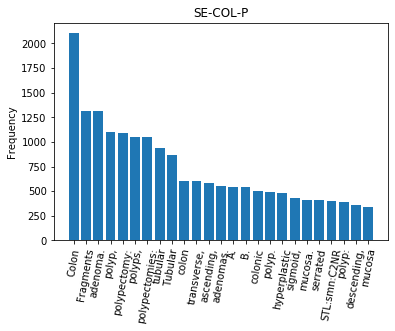



SIG-P 

polyp,          1695
Sigmoid         1668
polypectomy:    1491
biopsy:         1490
adenoma.        1357
polyp.          1332
Tubular         1255
sigmoid,        1195
Hyperplastic    1060
colon            986
Colon,           919
hyperplastic     832
Colon            729
A.               667
B.               643
Negative         608
Fragments        586
dysplasia        520
colon,           518
polyp            474
polyp:           425
malignancy.      419
reviewed         413
mucosa           413
This             413
dtype: int64


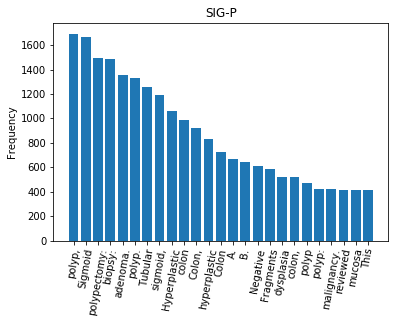



SINUS 

sinus           764
chronic         720
respiratory     675
mucosa          656
contents:       613
sinusitis.      504
Left            501
fragments       489
Right           474
benign          470
bone.           460
A.              438
B.              422
Benign          409
Chronic         398
Fragments       326
bone            325
Negative        290
malignancy.     282
inflammatory    277
upper           268
maxillary       252
inflamed        245
tissue          230
contents,       226
dtype: int64


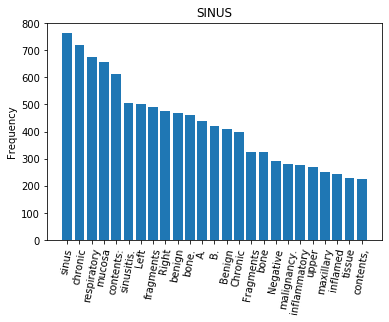



SK-AD 

Skin,                  1255
biopsy:                1197
shave                   947
This                    730
reviewed                730
Dermatopathologist.     730
case                    730
dictated                729
right                   589
left                    547
lateral                 534
Webb,                   468
D.O.,                   468
Alden                   468
Board-Certified         468
R.                      468
present                 449
margin.                 316
(see                    292
Comment).               283
melanocytic             267
Board                   262
Certified               262
Ph.D.,                  262
M.D.,                   262
dtype: int64


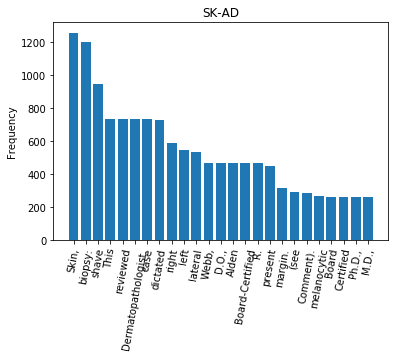



SK-DS 

Skin,                  1355
biopsy:                1246
punch                   715
(see                    712
Comment).               692
left                    652
right                   608
shave                   525
case                    480
reviewed                480
This                    478
Dermatopathologist.     478
dictated                477
lateral                 422
dermatitis              319
Board-Certified         297
D.O.,                   292
Alden                   292
Webb,                   292
R.                      292
present                 280
upper                   265
back,                   234
superior                208
proximal                199
dtype: int64


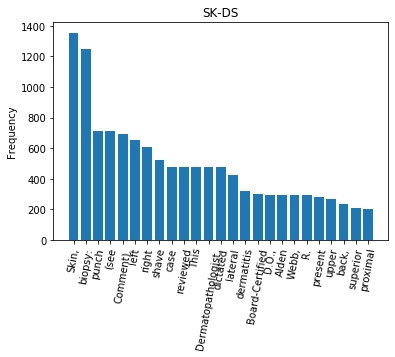



SK-EWD 

Skin,                  1463
biopsy:                1454
shave                  1279
biopsy                 1128
present                1035
edges.                  921
reviewed                749
dictated                749
This                    749
Dermatopathologist.     747
case                    747
Board-Certified         727
M.D.,                   702
Rozelle,                682
Christopher             682
L.                      681
left                    676
cell                    651
right                   642
deep                    499
carcinoma,              492
superficial             490
Basal                   385
upper                   381
CLR:smh:C1NR            380
dtype: int64


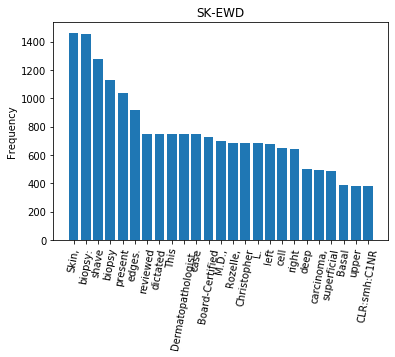



SK-NWD 

Skin,                  6545
biopsy:                6477
shave                  5869
case                   4543
reviewed               4542
This                   4541
Dermatopathologist.    4538
dictated               4533
Board-Certified        3382
R.                     3377
D.O.,                  3377
Alden                  3377
Webb,                  3374
present                3014
left                   3011
right                  2843
lateral                2605
cell                   2004
deep                   1915
margins.               1731
carcinoma,             1629
margin.                1594
upper                  1311
Basal                  1264
type;                  1196
dtype: int64


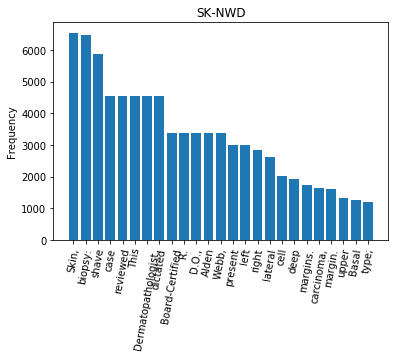



SK-VD 

Skin,                  4430
biopsy:                4427
shave                  3730
case                   3091
This                   3090
reviewed               3088
Dermatopathologist.    3084
dictated               3080
Board-Certified        2145
R.                     2133
Webb,                  2132
Alden                  2132
D.O.,                  2131
lateral                2115
present                2007
left                   1947
right                  1931
deep                   1327
margins.               1221
cell                   1120
M.D.,                   957
Zhang,                  943
Ph.D.,                  942
Board                   942
Certified               942
dtype: int64


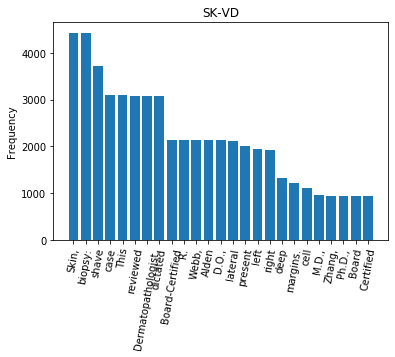



SKC1 

Skin,                  2065
This                   1458
reviewed               1455
case                   1454
dictated               1451
Dermatopathologist.    1410
excision:              1295
Board-Certified        1232
cyst.                  1105
biopsy:                1021
M.D.,                  1020
left                   1000
right                   980
A.                      725
inclusion               678
Benign                  608
Herreid,                524
Peter                   521
PH:clv:C2NR             458
Epidermal               407
shave                   397
R.                      393
Alden                   393
D.O.,                   393
Webb,                   392
dtype: int64


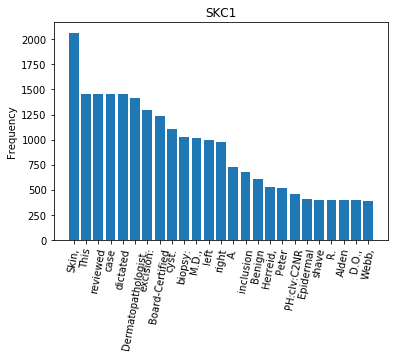



SKD1 

Skin,                  998
biopsy:                962
shave                  689
reviewed               466
dictated               466
This                   466
case                   466
Dermatopathologist.    466
left                   450
right                  420
Board-Certified        420
biopsy                 388
M.D.,                  293
cell                   290
present                289
Rozelle,               249
L.                     249
Christopher            245
punch                  243
edges.                 217
carcinoma,             210
absent                 183
Alden                  171
D.O.,                  171
Webb,                  171
dtype: int64


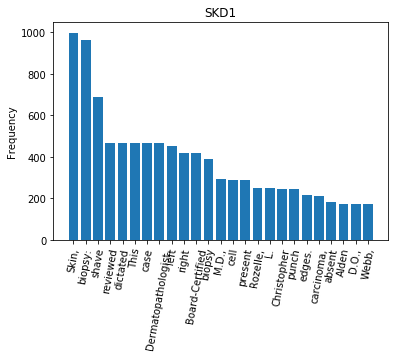



SKO1 

Skin,                  47821
biopsy:                38211
This                   23745
case                   23625
reviewed               23622
dictated               23496
Dermatopathologist.    22968
shave                  22933
left                   21371
right                  20495
Board-Certified        19949
M.D.,                  15967
cell                   13401
A.                     13024
present                12814
punch                   9490
lateral                 8995
carcinoma,              8207
keratosis.              7729
Herreid,                7592
Peter                   7581
R.                      7099
D.O.,                   7084
Webb,                   7082
Alden                   7081
dtype: int64


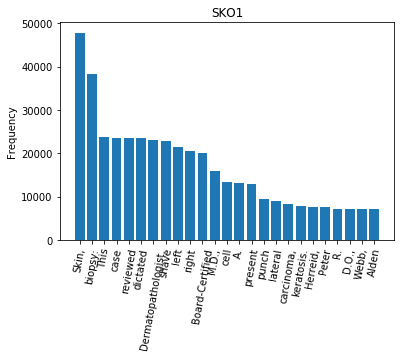



SKO1:U3COANHU2-BTXRC9W.DX3G 

Skin,                  2013
biopsy:                1656
shave                  1320
left                    911
right                   897
A.                      818
present                 783
cell                    712
C.                      708
B.                      705
lateral                 491
This                    440
reviewed                439
case                    438
dictated                438
Dermatopathologist.     432
carcinoma,              425
Board-Certified         376
margin.                 323
keratosis.              323
deep                    312
M.D.,                   298
upper                   293
Basal                   283
back,                   272
dtype: int64


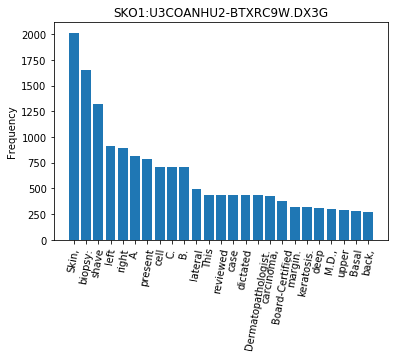



SKO1:YQ7GCLSI5MRLZOQC7UV3DA 

Skin,                  5323
biopsy:                4440
A.                     3291
shave                  3092
B.                     2841
left                   2419
right                  2297
present                1847
This                   1689
case                   1680
reviewed               1679
dictated               1671
cell                   1648
Dermatopathologist.    1642
Board-Certified        1444
lateral                1151
M.D.,                  1107
punch                  1034
carcinoma,              985
keratosis.              822
deep                    794
upper                   736
back,                   717
margin.                 714
Basal                   645
dtype: int64


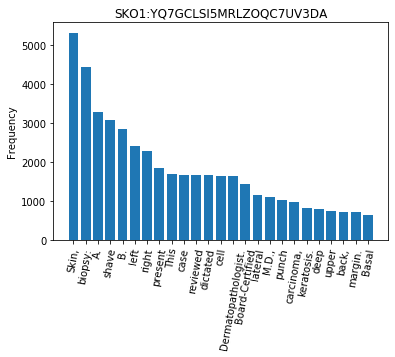



SKO2 

Skin,                  3718
excision:              2719
cell                   2228
left                   1762
right                  1585
This                   1506
case                   1496
reviewed               1494
dictated               1491
Dermatopathologist.    1449
residual               1301
M.D.,                  1190
Board-Certified        1055
basal                   979
margins                 965
carcinoma,              921
lateral                 875
carcinoma.              852
Negative                763
squamous                731
biopsy                  729
site                    699
A.                      697
carcinoma               590
margin.                 570
dtype: int64


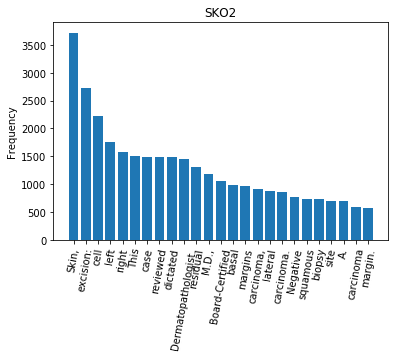



SKO3 

Skin,                  709
cell                   450
excision:              446
left                   334
case                   327
This                   327
reviewed               326
dictated               325
Dermatopathologist.    320
right                  319
M.D.,                  298
Board-Certified        274
residual               264
carcinoma,             214
margins                212
A.                     195
basal                  188
excision               177
carcinoma              152
Peter                  148
Herreid,               148
identified.            146
upper                  141
site                   137
back,                  136
dtype: int64


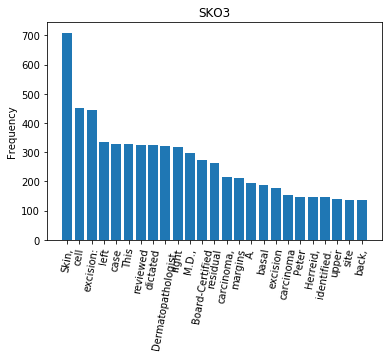



SKO4 

Skin,                  603
excision:              329
cell                   311
right                  283
left                   281
This                   254
reviewed               252
case                   250
residual               250
dictated               250
identified.            248
Dermatopathologist.    247
M.D.,                  237
Board-Certified        233
melanoma               223
excision               203
A.                     201
margins                183
carcinoma,             158
See                    151
Peter                  146
Herreid,               146
upper                  133
comment.               123
carcinoma              121
dtype: int64


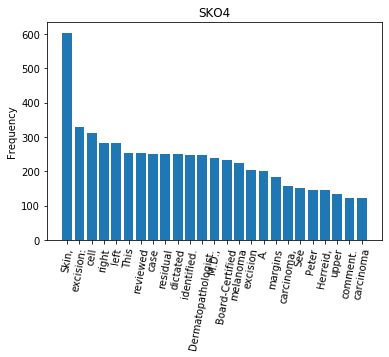



SMB-BX 

Negative        1643
biopsy:         1369
mucosa           842
malignancy.      731
dysplasia        678
A.               616
B.               609
biopsies:        546
chronic          498
Terminal         484
bowel            480
diagnostic       474
active           471
Colon,           438
No               438
ileum,           436
abnormality.     394
C.               375
colonic          353
Benign           352
Small            336
dysplasia.       333
mucosa.          306
colitis.         293
colon,           270
dtype: int64


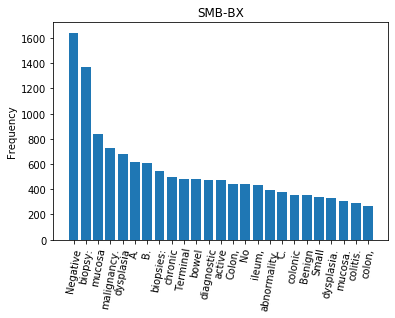



SOFT 

excision:              1296
tissue,                 883
Benign                  755
Soft                    694
tissue                  645
right                   559
Right                   510
biopsy:                 505
Left                    493
left                    492
consistent              474
mass,                   437
Negative                358
cyst.                   338
This                    333
reviewed                330
case                    329
malignancy.             329
dictated                327
A.                      302
Skin,                   296
lipoma.                 272
chronic                 254
Dermatopathologist.     254
Board-Certified         208
dtype: int64


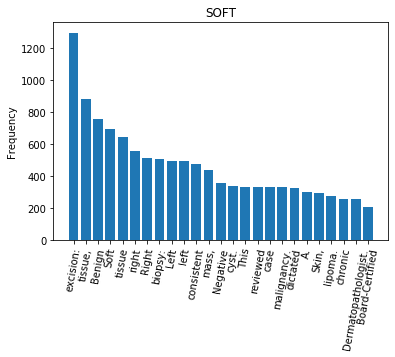



SOFT-O 

tissue,                810
Soft                   713
A.                     548
right                  526
Benign                 500
left                   484
This                   449
reviewed               443
case                   442
dictated               439
excision:              430
Dermatopathologist.    418
Board-Certified        416
M.D.,                  414
tissue                 380
biopsy:                329
Herreid,               326
Peter                  323
PH:clv:C2NR            320
Left                   309
See                    289
No                     286
Right                  271
consistent             257
comment.               246
dtype: int64


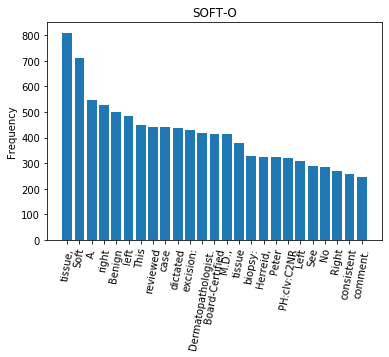



STOMBX 

Negative        1460
biopsy:          982
intestinal       827
mucosa           804
Stomach,         800
gastric          660
metaplasia       637
chronic          565
H.               543
biopsies:        543
pylori           500
A.               472
mucosa.          472
B.               459
dysplasia.       405
Helicobacter     343
reactive         334
Gastric          309
random,          298
mild             263
No               254
pylori.          252
dysplasia        251
Benign           245
gastritis.       233
dtype: int64


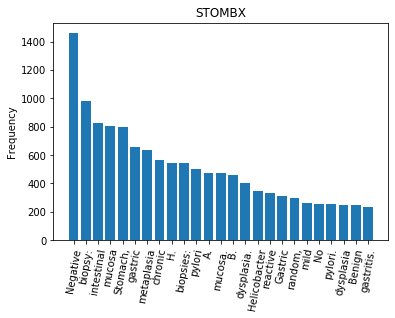



TONG-BX 

tongue:         760
report          660
ICD-10          481
internal        440
provided        440
information     440
lateral         421
Right           411
Left            396
squamous        251
within          226
The             225
including       222
received        222
may             221
additional      221
accurate        220
coding          220
recipient(s)    220
adjusted        220
appropriate     220
substitute      220
conveyed        220
office          220
It              220
dtype: int64


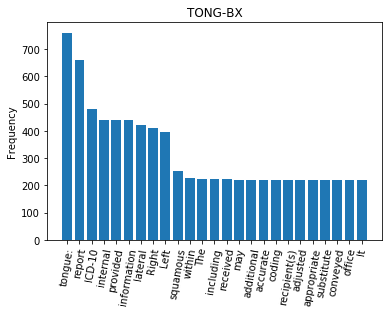



TONS1 

tonsillectomy:      565
hyperplasia.        542
lymphoid            490
Benign              482
tonsils,            322
Bilateral           303
follicular          281
bilateral           278
hyperplasia         260
Tonsils,            248
right               231
Left                217
reactive            183
Follicular          172
DS:mfr              169
Actinomyces         160
tonsillar           155
tissue              144
acute               140
tonsils             135
Right               131
tonsillectomies:    117
Negative            107
consistent          103
malignancy.         103
dtype: int64


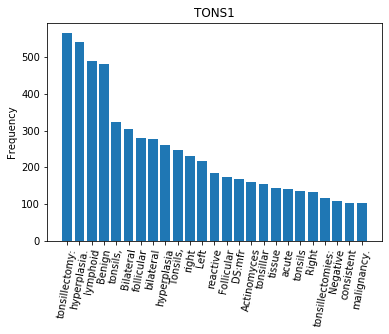



TONSB 

hyperplasia.      726
tonsillectomy:    701
Benign            650
bilateral         568
tonsils,          478
lymphoid          469
right             371
Left              327
Tonsils,          262
hyperplasia       230
Actinomyces       220
tissue            194
present.          180
chronic           175
Bilateral         169
tonsillar         168
left              154
reactive          149
Right             149
tonsils:          146
tonsils           143
No                141
acute             131
IRG:glc:C2NR      129
Reactive          127
dtype: int64


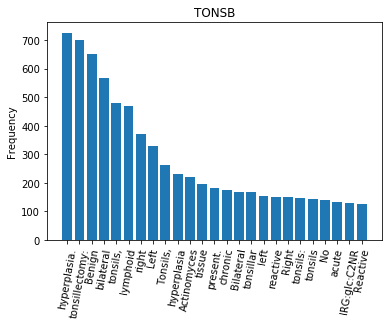



URINBL-BX 

biopsy:        1116
urothelial      731
Bladder,        633
No              489
identified.     464
chronic         421
Bladder         379
bladder         346
dysplasia       313
wall,           310
Negative        309
Benign          292
propria         277
malignancy.     275
without         237
mucosa          231
carcinoma       231
cystitis.       223
cystitis        200
Urinary         194
grade           194
Tumor           188
urothelium      186
bladder,        185
Urothelial      184
dtype: int64


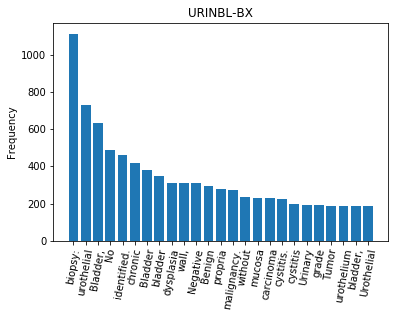



USBRSTNBX 

score:               4167
core                 3796
biopsy:              3766
o'clock,             3544
needle               3270
breast               3269
tumor                3007
ultrasound-guided    2941
3.                   2910
breast,              2507
grade                2047
ductal               2038
carcinoma            1992
Breast,              1992
score                1959
3                    1918
Left                 1859
identified.          1819
Right                1770
Absent.              1687
Benign               1679
2                    1624
1                    1580
Negative             1576
Tumor                1527
dtype: int64


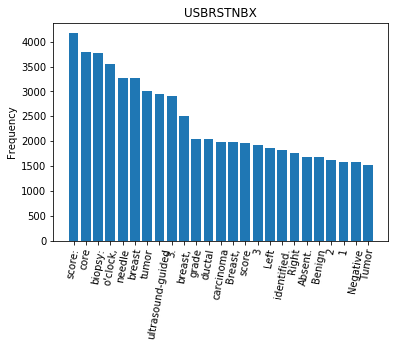



UT/TO-O 

fallopian         2113
Benign            1888
bilateral         1774
Uterus,            773
hysterectomy       760
tubes              742
tubes,             674
tubes:             565
Cervix:            560
Bilateral          554
Endometrium:       549
Myometrium:        539
Uterus             501
diagnostic         497
squamous           490
endometrium.       483
benign             476
proliferative      472
cervix,            453
salpingectomy:     449
left               432
abnormality.       432
right              397
endometrium        396
cysts.             378
dtype: int64


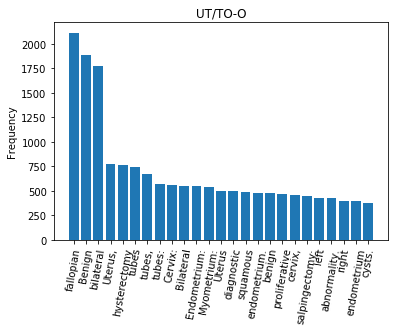



VAGBX 

biopsy:            513
squamous           390
Vaginal            346
dysplasia          230
mucosa             194
Negative           194
Benign             169
malignancy.        168
vaginal            158
Vagina,            149
See                119
intraepithelial    104
No                 104
mild                99
granulation         95
tissue              91
Squamous            90
chronic             89
identified.         86
A.                  83
grade               80
dysplasia.          80
B.                  77
atypia              76
lesion              73
dtype: int64


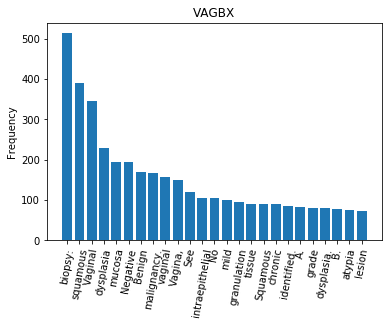



VULVBX 

biopsy:                1236
Vulva,                  502
dysplasia               457
Skin,                   417
squamous                389
vulva,                  377
Negative                340
See                     314
chronic                 294
Vulvar                  292
malignancy.             276
Benign                  265
No                      240
comment.                237
A.                      216
This                    198
case                    197
reviewed                197
dictated                195
lichen                  177
mild                    174
Dermatopathologist.     160
M.D.,                   157
Board-Certified         153
Lichen                  149
dtype: int64


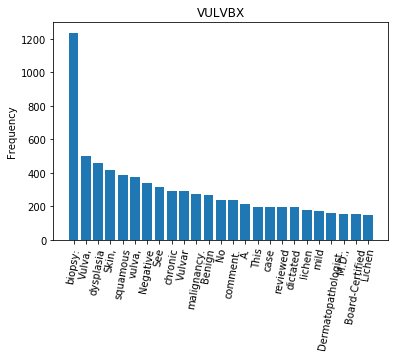

<Figure size 432x288 with 0 Axes>

In [8]:
for label in unique_labels.index:
    print(label,'\n')
    sf = data.sectionValue[label]
    temp = pd.DataFrame({'examCode':sf.index, 'sectionValue':sf.values})
    word_Index = generateWordIndex(temp)
    generateReport(word_Index, label)
    print('\n')
    